# Extract musical interests
In which we extract all FB interests (from the 2016 list) that relate to musical genres.

In [195]:
import pandas as pd
import re
import matplotlib.pyplot as plt

## Load data

In [117]:
all_interests = pd.read_csv('../../data/all_FB_interests_2016.zip', compression='zip', index_col=False)
all_interests.fillna(0, inplace=True)
all_interests.loc[:, 'name'] = all_interests.loc[:, 'name'].apply(lambda x: str(x))
all_interests.loc[:, 'path'] = all_interests.loc[:, 'path'].apply(lambda x: str(x))
all_interests.loc[:, 'id'] = all_interests.loc[:, 'id'].astype(long)
all_interests.head()

,name,audience_size,topic,path,disambiguation_category,id
0,Facebook,1.466366e+09,Business and industry,0,0,6003142505790
1,Technology,1.318222e+09,Technology,Technology,0,6003985771306
2,Entertainment,1.312986e+09,News and entertainment,Entertainment,0,6003349442621
3,Consumer electronics,1.214006e+09,Technology,Technology|Consumer electronics,0,6003716669862
4,Shopping and fashion,1.193714e+09,Shopping and fashion,Shopping and fashion,0,6003167425934


## Find music genres

In [118]:
music_matcher = re.compile('[Mm]usic')
music_interests = all_interests[all_interests.loc[:, 'name'].apply(lambda x: music_matcher.search(x) is not None)]
print('%d music interests'%(music_interests.shape[0]))
music_interests.head(50)

2712 music interests


,name,audience_size,topic,path,disambiguation_category,id
8,Music,1.060003e+09,News and entertainment,Entertainment|Music,0,6003020834693
18,Arts and music,8.624499e+08,Lifestyle and culture,Hobbies and activities|Arts and music,0,6003029869785
38,Pop music,6.542904e+08,News and entertainment,Entertainment|Music|Pop music,0,6003341579196
40,Rock music,6.489651e+08,News and entertainment,Entertainment|Music|Rock music,0,6003582732907
56,Music videos,5.248248e+08,News and entertainment,Entertainment|Music|Music videos,0,6003332483177
83,Electronic music,4.442013e+08,News and entertainment,Entertainment|Music|Electronic music,0,6003902397066
97,Rhythm and blues music,4.235852e+08,News and entertainment,Entertainment|Music|Rhythm and blues music,0,6003195554098
102,Hip hop music,4.051376e+08,News and entertainment,Entertainment|Music|Hip hop music,0,6003225556345
149,Soul music,3.311537e+08,News and entertainment,Entertainment|Music|Soul music,0,6003107699532
156,Country music,3.168296e+08,News and entertainment,Entertainment|Music|Country music,0,6003493980595


In [119]:
music_path_matcher = re.compile('Entertainment\|Music')
music_path_interests = all_interests[all_interests.loc[:, 'path'].apply(lambda x: music_path_matcher.search(x) is not None)]
print('%d music path interests'%(music_path_interests.shape[0]))
print(','.join(music_path_interests.loc[:, 'name'].sort_values(inplace=False).unique()))

15 music path interests
Blues music,Classical music,Country music,Dance music,Electronic music,Gospel music,Heavy metal music,Hip hop music,Jazz music,Music,Music videos,Pop music,Rhythm and blues music,Rock music,Soul music


In [120]:
music_category = 'Musical Genre'
music_interests_1 = all_interests[all_interests.loc[:, 'disambiguation_category'] == music_category]
print('%d music cat interests'%(music_interests_1.shape[0]))
print(','.join(music_interests_1.loc[:, 'name'].sort_values(inplace=False).unique()))

524 music cat interests
2 Tone,20th-century Classical Music,21st-century classical music,4-beat,A cappella,Abwe,Acid house,Acid jazz,Acid rock,Acid techno,Acid trance,Acoustic folk,Active rock,Adani,Adult album alternative,African hip hop,African popular music,Afro-Cuban jazz,Afro-punk,Afrobeat,Album-oriented rock,Alternative country,Ambient house,Anatolian rock,Andalusian classical music,Andean music,Anti-folk,Apala,Arabesque (Turkish music),Arena rock,Argentine cumbia,Argentine rock,Argentine tango,Art music,Art punk,Asian Underground,Atlanta hip hop,Atonality,Australian hip hop,Avant-garde jazz,Avant-garde metal,Avant-garde music,Ax̩ (music),Bakersfield sound,Bal-musette,Baladi,Balearic beat,Balearic trance,Baltimore club,Barbershop music,Bard (Soviet Union),Baroque music,Baroque pop,Bassline (music genre),Beat music,Beatboxing,Belgian rock,Bhajan,Big beat,Bikutsi,Boi (music),Boogaloo,Boogie (genre),Boogie rock,Bounce music,Bouncy techno,Bouyon music,Bozlak,Brazilian hip hop,Breakbe

This list is not big enough! Let's use all interests that end with "music" or "(music)".

In [121]:
music_matcher_2 = re.compile('music$|\(music\)$')
music_interests_2 = all_interests[all_interests.loc[:, 'name'].apply(lambda x: music_matcher_2.search(x) is not None)]
print('%d music interests'%(music_interests_2.shape[0]))
music_interests_2.loc[:, 'name'].unique()

356 music interests


array(['Arts and music', 'Pop music', 'Rock music', 'Electronic music',
       'Rhythm and blues music', 'Hip hop music', 'Soul music',
       'Country music', 'Heavy metal music', 'Christian music',
       'Blues music', 'Jazz music', 'House music', 'World music',
       'African-American music', 'Dance music', 'Gospel music',
       'Latin American music', 'Electronic dance music', 'Classical music',
       'Single (music)', 'Popular music', 'New wave music',
       'Contemporary Christian music', 'Christmas music', 'Swing music',
       'American folk music', 'Ambient music', 'Trance music',
       'Bachata (music)', 'Folk music', 'Beat (music)', 'Industrial music',
       'Sampling (music)', 'Salsa music', 'Electro (music)',
       'Calypso music', 'Lounge music', 'Phrase (music)', 'Merengue music',
       'Solo (music)', 'Cha-cha-cha (music)', 'Pitch (music)',
       'Mexican pop music', 'Dub (music)', 'Emo (music)', 'Romantic music',
       'Banda (music)', 'Beautiful music', 'No

This seems like a good list! But is it leaving anything out?

In [122]:
test_genres = ['salsa', 'tango', 'merengue', 'bolero', 'mariachi']
for g in test_genres:
    g_matcher = re.compile(g)
    g_interests = all_interests[all_interests.loc[:, 'name'].apply(lambda x: g_matcher.search(x.lower()) is not None)]
    print('test genre=%s with %d matching interests'%(g, g_interests.shape[0]))
    print('\n'.join(g_interests.loc[:, 'name'].unique()))

test genre=salsa with 22 matching interests
Salsa music
Salsa (dance)
Salsa (sauce)
Salsa rom��ntica
Salsa congress
Salsa dura
Addicted2Salsa
Bailar Salsa
HECTOR LAVOE- LEYENDA DE LA SALSA
Salsa Maelo Ruiz
Ruben Blades: La Salsa del Subdesarrollo
Salsa Erotica
Oxnard Salsa Festival
Cuban Salsa Dance Cubana
Baila en Cuba - Salsa Congress in Havanna
Yo tambien amo la SALSA...!!
Peruanos en su Salsa
I LOVE SALSA DC
Salsa Con Estilo ((( www.salsaconestilo.com ))) LA COMUNIDAD SALSERA
Salsa Cubaine
Cuban Salsa
The Salsa Rueda Festival
test genre=tango with 22 matching interests
Tango
Tango music
Tango (application)
Tango (drink)
Argentine tango
Tango Province
TANGO WAFER RENYAH
Tango Waffle
Blacklight: Tango Down
Project Tango
tango argentino
Last Tango in Paris
Adidas Tango 12
Bang Tango
Last Tango in Halifax
Bajofondo Tango Club (album)
Dni Tango
Academia Nacional del Tango de la Rep̼blica Argentina
Arjantin Tango
Adidas Tango
Geraldin Rojas Paludi - Tango
OSLO Tango Marathon
test genre=m

Problem! Most of these interests are not marked by "music".

In [123]:
all_interests[all_interests.loc[:, 'name'] == 'Mariachi']

,name,audience_size,topic,path,disambiguation_category,id
2784,Mariachi,31245180.0,News and entertainment,0,0,6003281529097


Is there a list of musical genres that we can cross-reference against?

In [124]:
# use SPARQL to access DBPedia
from SPARQLWrapper import SPARQLWrapper, JSON
sparql = SPARQLWrapper("http://dbpedia.org/sparql")

# take 1: collect all subclasses of music genre
# problem: this includes a lot of noise like "Fairy Novel"
# sparql.setQuery("""
# SELECT ?name
# WHERE {
#   ?entity rdfs:label ?name.
#   ?entity rdf:type ?type.
#   ?type rdfs:subClassOf* dbo:MusicGenre.
#   FILTER(langmatches(lang(?name), "en"))
# }
# """)

# take 2: collect all music subgenres for Music of Latin America
sparql.setQuery("""
SELECT ?name
WHERE {
  ?entity rdfs:label ?name.
  dbr:Music_of_Latin_America dbo:musicSubgenre ?entity.
  FILTER(langmatches(lang(?name), "en"))
}
""")

sparql.setReturnFormat(JSON)
results = sparql.query().convert()
result_names = sorted([r['name']['value'] for r in results['results']['bindings']])
print(','.join(result_names))
music_interests_3 = all_interests[all_interests.loc[:, 'name'].isin(result_names)]
print('%d Latin American interests'%(music_interests_3.shape[0]))
music_interests_3.head()

Axé (music),Bachata (music),Baião (music),Bambuco,Banda (music),Batucada,Biguine,Bolero,Bomba (Puerto Rico),Boogaloo,Bossa nova,Brazilian rock,Cha-cha-cha (music),Changüí,Charanga (Cuba),Choro,Compas,Conga (music),Conjunto,Contradanza,Corrido,Cuarteto,Cuban rumba,Cueca,Cumbia,Danza,Danzón,Duranguense,Filin (music),Forró,Frevo,Funk carioca,Guaguancó,Guaracha,Gwo ka,Huapango,Huayno,Jarabe,Joropo,Kwadril,Lambada,Lundu (dance),Mambo (music),Mariachi,Merengue music,Milonga (music),Méringue,Música popular brasileira,Música sertaneja,Norteño (music),Nueva canción,Nueva trova,Orquesta típica,Pachanga,Pagode,Pambiche,Pasillo,Payada,Plena,Porro,Punto guajiro,Ranchera,Rasin,Reggaeton,Rondalla,Salsa music,Samba,Seis,Son (music),Son Jarocho,Son jalisciense,Son montuno,Songo music,Tango music,Tejano music,Timba,Tonada,Tropicália,Trío romántico,Twoubadou,Vallenato,Vals criollo,Zouk
39 Latin American interests


,name,audience_size,topic,path,disambiguation_category,id
1023,Reggaeton,78852370.0,News and entertainment,0,0,6003434636451
1686,Bachata (music),51429630.0,News and entertainment,0,0,6003143764440
1970,Salsa music,43638040.0,News and entertainment,0,0,6003668231507
2171,Samba,39644950.0,News and entertainment,0,0,6003302709853
2549,Ranchera,33694270.0,News and entertainment,0,0,6002957429850


Let's combine all the musical genres and the corresponding IDs, then write to JSON file.

In [125]:
music_interests_combined = pd.concat([music_interests_1, music_interests_2, music_interests_3], axis=0)
# deduplicate
music_interests_combined.drop_duplicates('id', inplace=True)
print('%d combined music interests'%(music_interests_combined.shape[0]))
music_interests_combined.head()

732 combined music interests


,name,audience_size,topic,path,disambiguation_category,id
8364,Rocksteady,9919710.0,News and entertainment,0,Musical Genre,6003314921218
8386,Christian hip hop,9893950.0,News and entertainment,0,Musical Genre,6003140211647
8387,Noise music,9892570.0,0,0,Musical Genre,6003258005082
8391,Flamenco,9881550.0,News and entertainment,0,Musical Genre,6003074062797
8454,Psychedelic trance,9793400.0,News and entertainment,0,Musical Genre,6003419806154


In [129]:
import json
out_file = '../../data/queries/musical_genre_interests.json'
music_interests_json = music_interests_combined.loc[:, ['name', 'id']]
# fix names
music_interests_json = music_interests_json.apply(lambda x: x.to_dict(), axis=1)
# fix IDs
music_interests_json = music_interests_json.apply(lambda x: {'name' : x['name'], 'id' : str(long(x['id']))})
music_interests_json = {'data' : music_interests_json.tolist()}
json.dump(music_interests_json, open(out_file, 'w'), indent=4, encoding='latin-1')

While we're at it, let's build the entire query.

In [146]:
full_query = {
    'interests' : [{'name' : [i['name']], 'or' : [i['id']]} 
                   for i in music_interests_json['data']],
    'ages_ranges' : [{'min' : 13, 'max' : 65}],
    'geo_locations': [{
        'values' : ['US'],
        'location_types':[
            'home'
        ],
        'name': 'countries'
    }],
    'behavior':[
        {
            "and": [
                6023676072183
            ], 
            "or": [
                6003133212372
            ], 
            "name": "Hispanic (All) AND Ex-pats (Mexico)"
        },
        {
            "not": [
                6023676072183
            ],
            "name": "Non-Expats"
        }
    ],
    'genders':[0],
    'name': "Hispanic Mexican Ex-pats and non-Expats Musical Interests"
}
full_query_file = '../../data/queries/US_hispanic_expat_non_expats_music_interests.json'
json.dump(full_query, open(full_query_file, 'w'), indent=4, encoding='latin-1')

## Explore results

After mining Facebook (`mine_facebook_audience.ipynb`) we have some results! Let's see the interests.

In [202]:
results_file_1 = '../../data/query_results/US_hispanic_expat_non_expats_music_interests.tsv'
results_file_2 = '../../data/query_results/MX_non_expats_music_interests.tsv'
music_results_1 = pd.read_csv(results_file, sep='\t', index_col=False)
music_results_2 = pd.read_csv(results_file_2, sep='\t', index_col=False)
music_results = pd.concat([music_results_1, music_results_2], axis=0)
json_cols = ['behavior', 'interests', 'geo_locations']
for c in json_cols:
    music_results.loc[:, c] = music_results.loc[:, c].apply(json.loads)
music_results.loc[:, 'behavior_name'] = music_results.loc[:, 'behavior'].apply(lambda x: x['name'])
music_results.loc[:, 'interest_name'] = music_results.loc[:, 'interests'].apply(lambda x: x['name'][0])
music_results.loc[:, 'location_name'] = music_results.loc[:, 'geo_locations'].apply(lambda x: x['values'][0])
music_results.head()

,name,interests,ages_ranges,genders,behavior,scholarities,languages,family_statuses,relationship_statuses,geo_locations,...,all_fields,targeting,response,dau_audience,mau_audience,timestamp,publisher_platforms,behavior_name,interest_name,location_name
0,Hispanic Mexican Ex-pats and non-Expats Musica...,"{u'name': [u'Rocksteady'], u'or': [u'600331492...","{""max"": 65, ""min"": 13}",0.0,"{u'and': [6023676072183], u'or': [600313321237...",NaN,NaN,NaN,NaN,"{u'values': [u'US'], u'location_types': [u'hom...",...,"(('interests', {u'name': [u'Rocksteady'], u'or...","{""flexible_spec"": [{""interests"": [{""id"": ""6003...","{""data"":[{""bid_estimate"":{""min_bid"":212,""media...",142153,150000,1528466584,"[""facebook""]",Hispanic (All) AND Ex-pats (Mexico),Rocksteady,US
1,Hispanic Mexican Ex-pats and non-Expats Musica...,"{u'name': [u'Rocksteady'], u'or': [u'600331492...","{""max"": 65, ""min"": 13}",0.0,"{u'not': [6015559470583, 6025978286383], u'nam...",NaN,NaN,NaN,NaN,"{u'values': [u'US'], u'location_types': [u'hom...",...,"(('interests', {u'name': [u'Rocksteady'], u'or...","{""flexible_spec"": [{""interests"": [{""id"": ""6003...","{""data"":[{""bid_estimate"":{""min_bid"":748,""media...",96804,110000,1528466584,"[""facebook""]",Not Expats and close friends of expats,Rocksteady,US
2,Hispanic Mexican Ex-pats and non-Expats Musica...,"{u'name': [u'Christian hip hop'], u'or': [u'60...","{""max"": 65, ""min"": 13}",0.0,"{u'and': [6023676072183], u'or': [600313321237...",NaN,NaN,NaN,NaN,"{u'values': [u'US'], u'location_types': [u'hom...",...,"(('interests', {u'name': [u'Christian hip hop'...","{""flexible_spec"": [{""interests"": [{""id"": ""6003...","{""data"":[{""bid_estimate"":{""min_bid"":14491,""med...",344501,400000,1528466584,"[""facebook""]",Hispanic (All) AND Ex-pats (Mexico),Christian hip hop,US
3,Hispanic Mexican Ex-pats and non-Expats Musica...,"{u'name': [u'Christian hip hop'], u'or': [u'60...","{""max"": 65, ""min"": 13}",0.0,"{u'not': [6015559470583, 6025978286383], u'nam...",NaN,NaN,NaN,NaN,"{u'values': [u'US'], u'location_types': [u'hom...",...,"(('interests', {u'name': [u'Christian hip hop'...","{""flexible_spec"": [{""interests"": [{""id"": ""6003...","{""data"":[{""bid_estimate"":{""min_bid"":189,""media...",1118259,1300000,1528466584,"[""facebook""]",Not Expats and close friends of expats,Christian hip hop,US
4,Hispanic Mexican Ex-pats and non-Expats Musica...,"{u'name': [u'Noise music'], u'or': [u'60032580...","{""max"": 65, ""min"": 13}",0.0,"{u'and': [6023676072183], u'or': [600313321237...",NaN,NaN,NaN,NaN,"{u'values': [u'US'], u'location_types': [u'hom...",...,"(('interests', {u'name': [u'Noise music'], u'o...","{""flexible_spec"": [{""interests"": [{""id"": ""6003...","{""data"":[{""bid_estimate"":{""min_bid"":707,""media...",245740,280000,1528466584,"[""facebook""]",Hispanic (All) AND Ex-pats (Mexico),Noise music,US


Let's get the audience counts for each behavior type.

In [203]:
music_audience_counts = music_results.loc[:, ['dau_audience', 'mau_audience', 'interest_name', 'behavior_name', 'location_name']]
relevant_cols = ['dau_audience', 'mau_audience', 'interest_name']
for (g_loc_name, g_behavior_name), g_data in music_audience_counts.groupby(['location_name', 'behavior_name']):
    out_file = '../../data/query_results/%s_%s_music_interest_audience_counts.tsv'%(g_loc_name, g_behavior_name.replace(' ', '_'))
    g_data = g_data.loc[:, relevant_cols]
    # get rid of max data!!
    mau_max = g_data.loc[:, 'mau_audience'].max()
    g_data = g_data[g_data.loc[:, 'mau_audience'] < mau_max]
    g_data.to_csv(out_file, sep='\t', index=False, encoding='utf-8')

Using these three data points (Mexican, US, Expats), let's compute the degree of musical assimilation in the Expats.

We'll compare:
- all interests
- Latin American interests

In [259]:
def compute_assimilation(source_counts, dest_counts, expat_counts, 
                         audience_var='mau_audience', TOP_DEST_PCT=50,
                        score_type='-'):
    """
    Compute the degree of assimilation in the interest counts
    of the expats, based on similarity to target and dissimilarity
    from source.
    
    :param source_counts: audience counts for source country
    :param dest_counts: audience counts for destination country
    :param expat_counts: audience counts for expats
    :param audience_var: audience variable name
    :param TOP_DEST_PCT: percentile above which to keep destination interests
    :param score_type: difference operation for comparing dest, expats
    :return: scores: per-interest assimilation scores
    """
    source_counts = source_counts.copy()
    dest_counts = dest_counts.copy()
    expat_counts = expat_counts.copy()
    # add interests as indices
    def add_idx(x):
        x.index = x.loc[:, 'interest_name']
        return(x)
    source_counts = add_idx(source_counts)
    dest_counts = add_idx(dest_counts)
    expat_counts = add_idx(expat_counts)
    # also restrict to audience var
    source_counts = source_counts.loc[:, audience_var].astype(float)
    dest_counts = dest_counts.loc[:, audience_var].astype(float)
    expat_counts = expat_counts.loc[:, audience_var].astype(float)
    
    # remove max audience scores because those are usually wrong
    filter_max = lambda x: x[x < x.max()]
    source_counts = filter_max(source_counts)
    dest_counts = filter_max(dest_counts)
    expat_counts = filter_max(expat_counts)
    # restrict to shared interests to make sure the math works out
    shared_interests = dest_counts.index & source_counts.index & expat_counts.index
    dest_counts = dest_counts.loc[shared_interests]
    source_counts = source_counts.loc[shared_interests]
    expat_counts = expat_counts.loc[shared_interests]
    
    # normalize to percents
    norm_pct = lambda x: x / x.sum()
    source_pct = norm_pct(source_counts)
    dest_pct = norm_pct(dest_counts)
    expat_pct = norm_pct(expat_counts)
    
    # restrict to destination interests 
    # (e.g. we only care about how "American" an expat is)
    # also restrict to destination interests that
    # have bigger audience than source interests
#     dest_interests_relevant = (dest_pct > source_pct)
#     dest_pct = dest_pct[dest_interests_relevant]
#     source_pct = source_pct[dest_interests_relevant]
#     expat_pct = expat_pct[dest_interests_relevant]
    
    # restrict to high-pct destination interests
    diff_func = lambda x,y: x-y if score_type=='-' else x/y
    dest_source_diff = diff_func(dest_pct, source_pct)
    dest_source_diff_cutoff = pd.np.percentile(dest_source_diff, TOP_DEST_PCT)
    high_dest_source_diff = (dest_source_diff > dest_source_diff_cutoff)
    
    dest_pct_high = dest_pct[high_dest_source_diff]
    expat_pct_high = expat_pct[high_dest_source_diff]
    
    # compute scores!
    scores = diff_func(expat_pct_high, dest_pct_high)
    
    return(scores)

In [245]:
source_country = 'MX'
dest_country = 'US'
source_counts = music_audience_counts[(music_audience_counts.loc[:, 'location_name'] == source_country) & 
                                      (music_audience_counts.loc[:, 'behavior_name'] == 'Not Expats and close friends of expats')]
dest_counts = music_audience_counts[(music_audience_counts.loc[:, 'location_name']==dest_country) & 
                                    (music_audience_counts.loc[:, 'behavior_name'] == 'Not Expats and close friends of expats')]
expat_counts = music_audience_counts[music_audience_counts.loc[:, 'behavior_name'] == 'Hispanic (All) AND Ex-pats (Mexico)']
print('%d source, %d dest, %d expat'%(source_counts.shape[0], dest_counts.shape[0], expat_counts.shape[0]))

732 source, 732 dest, 732 expat


In [260]:
# all interests
all_interest_scores = compute_assimilation(source_counts, dest_counts, expat_counts, TOP_DEST_PCT=50)
all_interest_scores.sort_values(inplace=True, ascending=False)
print(all_interest_scores)

interest_name
Pop music                     0.002440
Beautiful music               0.001307
Highlife                      0.000833
African-American music        0.000775
Boogie (genre)                0.000523
Vocal music                   0.000444
Old-school hip hop            0.000431
Hardcore hip hop              0.000409
Visual kei                    0.000373
Turntablism                   0.000342
Hyphy                         0.000314
Underground hip hop           0.000294
Bounce music                  0.000234
Afrobeat                      0.000223
Hardstyle                     0.000195
Mode (music)                  0.000192
Acid trance                   0.000139
Pinoy hip hop                 0.000132
Lo-fi music                   0.000130
Stoner rock                   0.000123
New school hip hop            0.000116
Crunk                         0.000106
Acid jazz                     0.000104
Funk carioca                  0.000099
Underground music             0.000096
Ragtime    

This seems off! Shouldn't the traditional Latin American interests be at the top? Or did those get filtered by the cutoff percent?

In [262]:
LA_interests = ['Salsa (music)', 'Mexican cumbia', 'Tango music', 'Rumba (dance)']
print(all_interests.index & set(LA_interests))

Index([], dtype='object')


That's the problem: the traditional LA interests get removed by the difference cutoff (dest - source).

What if we vary the cutoff percent?

537 final scores
mean score -2.827E-04 +/- 2.453E-03
447 final scores
mean score -3.896E-04 +/- 2.668E-03
295 final scores
mean score -5.979E-04 +/- 3.266E-03
149 final scores
mean score -1.194E-03 +/- 4.524E-03
60 final scores
mean score -2.955E-03 +/- 6.783E-03


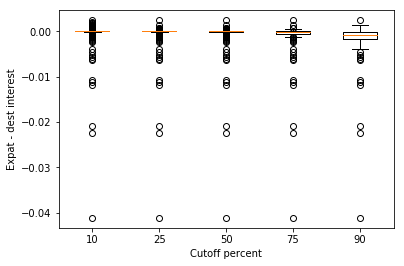

In [263]:
cutoff_pcts = [10, 25, 50, 75, 90]
all_scores = []
for cutoff_pct in cutoff_pcts:
    scores = compute_assimilation(source_counts, dest_counts, expat_counts, TOP_DEST_PCT=cutoff_pct)
    scores.sort_values(inplace=True, ascending=False)
    print('%d final scores'%(scores.shape[0]))
    all_scores.append(scores)
    print('mean score %.3E +/- %.3E'%(scores.mean(), scores.std()))
#     print(scores)
X = pd.np.arange(len(cutoff_pcts))+1
plt.boxplot(all_scores)
plt.xticks(X, cutoff_pcts)
plt.xlabel('Cutoff percent')
plt.ylabel('Expat - dest interest')
plt.show()

As we restrict to interests that are more associated with the destination (higher cutoff percent) we see a tendency for the differences to be more negative (more tendency toward destination interest). Good sanity check!

What if we use division?

537 final scores
mean score 2.372E+00 +/- 6.354E+00
447 final scores
mean score 1.706E+00 +/- 2.395E+00
298 final scores
mean score 1.095E+00 +/- 7.734E-01
149 final scores
mean score 9.592E-01 +/- 5.884E-01
59 final scores
mean score 9.061E-01 +/- 4.326E-01


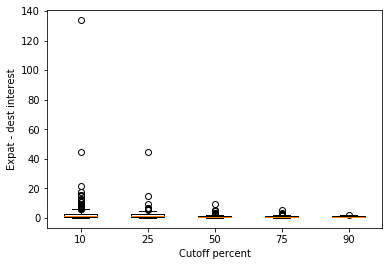

In [265]:
cutoff_pcts = [10, 25, 50, 75, 90]
all_scores = []
for cutoff_pct in cutoff_pcts:
    scores = compute_assimilation(source_counts, dest_counts, expat_counts, 
                                  TOP_DEST_PCT=cutoff_pct, score_type='/')
    scores.sort_values(inplace=True, ascending=False)
    print('%d final scores'%(scores.shape[0]))
    all_scores.append(scores)
    print('mean score %.3E +/- %.3E'%(scores.mean(), scores.std()))
X = pd.np.arange(len(cutoff_pcts))+1
plt.boxplot(all_scores)
plt.xticks(X, cutoff_pcts)
plt.xlabel('Cutoff percent')
plt.ylabel('Expat - dest interest')
plt.show()

In [266]:
all_scores[0]

interest_name
Wonky (music)                   133.715480
Andean music                     44.571827
Brega (music)                    21.394477
Merengue music                   17.643015
Flamenco rumba                   15.766905
Rumba (dance)                    15.731233
Sevillanas                       14.857276
Salsa dura                       12.876305
Cuban rumba                      11.825178
Music of Cuba                    10.697238
Andalusian classical music       10.440248
Arabic pop music                  9.508656
Soukous                           8.419123
MÌÁkina                           7.951781
Son montuno                       7.684798
Guaracha                          7.483665
Wedding music                     7.131492
Afro-Cuban jazz                   6.933395
Bomba (Puerto Rico)               6.904263
Funk ostentaÌ¤Ì£o                 6.834347
RaÌø                              6.753307
Salsa music                       6.424768
Flamenco                          6.3674

There we go! The LA music is back at the top because of the lower cutoff.

In [269]:
all_scores[0].mean()

2.372201625755711

## Assimilation by KL divergence

I still think that we should be using KL divergence to compare destination-expat probabilities with destination-souce probabilities. 

Let's do that!

First, let's plot the probability distributions for all three.

In [271]:
audience_var = 'mau_audience'
source_counts = source_counts.copy()
dest_counts = dest_counts.copy()
expat_counts = expat_counts.copy()
# add interests as indices
def add_idx(x):
    x.index = x.loc[:, 'interest_name']
    return(x)
source_counts = add_idx(source_counts)
dest_counts = add_idx(dest_counts)
expat_counts = add_idx(expat_counts)
# also restrict to audience var
source_counts = source_counts.loc[:, audience_var].astype(float)
dest_counts = dest_counts.loc[:, audience_var].astype(float)
expat_counts = expat_counts.loc[:, audience_var].astype(float)

# remove max audience scores because those are usually wrong
filter_max = lambda x: x[x < x.max()]
source_counts = filter_max(source_counts)
dest_counts = filter_max(dest_counts)
expat_counts = filter_max(expat_counts)
# restrict to shared interests to make sure the math works out
shared_interests = dest_counts.index & source_counts.index & expat_counts.index
dest_counts = dest_counts.loc[shared_interests]
source_counts = source_counts.loc[shared_interests]
expat_counts = expat_counts.loc[shared_interests]

# normalize to percents
norm_pct = lambda x: x / x.sum()
source_pct = norm_pct(source_counts)
dest_pct = norm_pct(dest_counts)
expat_pct = norm_pct(expat_counts)

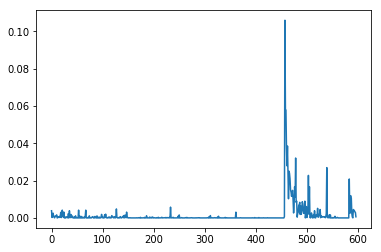

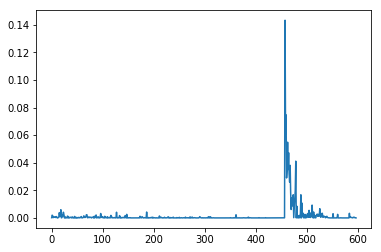

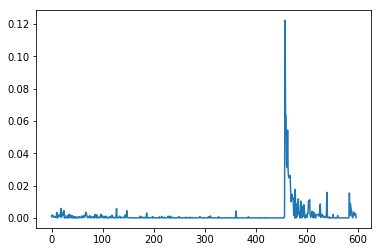

In [272]:
X = pd.np.arange(len(source_pct))
for pct in [source_pct, dest_pct, expat_pct]:
    plt.plot(X, pct)
    plt.show()

Are these distributions too similar to tell apart with something like a t-test over differences?

In [283]:
from scipy.stats import ttest_1samp
source_dest_diffs = source_pct - dest_pct
source_expat_diffs = source_pct - expat_pct
dest_expat_diffs = dest_pct - expat_pct
t1, p1 = ttest_1samp(source_dest_diffs, 0)
t2, p2 = ttest_1samp(source_expat_diffs, 0)
t3, p3 = ttest_1samp(dest_expat_diffs, 0)
print('source vs. dest = %.3E (p=%.3E)'%(t1, p1))
print('source vs. expat = %.3E (p=%.3E)'%(t2, p2))
print('dest vs. expat = %.3E (p=%.3E)'%(t3, p3))

source vs. dest = -5.056E-16 (p=1.000E+00)
source vs. expat = -1.192E-16 (p=1.000E+00)
dest vs. expat = -2.028E-16 (p=1.000E+00)


OK! So the pairwise differences are too close to zero to differentiate. Let's try KL.

In [285]:
from scipy.stats import entropy
kl_1 = entropy(source_pct, dest_pct)
kl_2 = entropy(source_pct, expat_pct)
kl_3 = entropy(dest_pct, expat_pct)
print('source vs. dest = %.3E'%(kl_1))
print('source vs. expat = %.3E'%(kl_2))
print('dest vs. expat = %.3E'%(kl_3))

source vs. dest = 8.162E-01
source vs. expat = 7.055E-01
dest vs. expat = 6.910E-01


Suggestive results: destination is slightly (?) closer to expats than source. Does this hold up with multiple bootstraps?

In [292]:
pd.np.random.seed(123)
bootstraps = 100
sample_size = int(0.5*len(source_pct))
kl_diffs = []
for i in range(bootstraps):
    sample_idx = pd.np.random.choice(source_pct.index, size=sample_size, replace=False)
    kl_1 = entropy(source_pct.loc[sample_idx], expat_pct.loc[sample_idx])
    kl_2 = entropy(dest_pct.loc[sample_idx], expat_pct.loc[sample_idx])
    kl_diff = kl_1 - kl_2
    kl_diffs.append(kl_diff)
t, p = ttest_1samp(kl_diffs, 0)
print('KL diff=%.3E, t=%.3E (p=%.3E)'%(pd.np.mean(kl_diffs), t, p))

KL diff=-4.358E-03, t=-2.639E-01 (p=7.924E-01)


Weak tendency for source-expat to have lower KL than source-target, but not significant.

What if we restrict to the high end of both source and destination?

In [296]:
cutoff_pct = 50
filter_cutoff = lambda x: x[x > pd.np.percentile(x, cutoff_pct)]
source_pct_cutoff = filter_cutoff(source_pct)
dest_pct_cutoff = filter_cutoff(dest_pct)
# find shared index!
source_expat_idx = source_pct_cutoff.index & expat_pct.index
dest_expat_idx = dest_pct_cutoff.index & expat_pct.index
kl_1 = entropy(source_pct_cutoff.loc[source_expat_idx], 
               expat_pct.loc[source_expat_idx])
kl_2 = entropy(dest_pct_cutoff.loc[dest_expat_idx], 
               expat_pct.loc[dest_expat_idx])
print('source vs. expat = %.3E'%(kl_1))
print('dest vs. expat = %.3E'%(kl_2))

source vs. expat = 6.834E-01
dest vs. expat = 6.569E-01


Slightly bigger difference! There is more divergence between source/expat than dest/expat. 

Is this significant?

In [303]:
pd.np.random.seed(123)
bootstraps = 100
sample_size = int(0.5*len(source_pct_cutoff))
kl_diffs = []
for i in range(bootstraps):
    sample_idx_1 = pd.np.random.choice(source_expat_idx, size=sample_size, replace=False)
    sample_idx_2 = pd.np.random.choice(dest_expat_idx, size=sample_size, replace=False)
    kl_1 = entropy(source_pct_cutoff.loc[sample_idx_1], expat_pct.loc[sample_idx_1])
    kl_2 = entropy(dest_pct_cutoff.loc[sample_idx_2], expat_pct.loc[sample_idx_2])
    kl_diff = kl_1 - kl_2
    kl_diffs.append(kl_diff)
t, p = ttest_1samp(kl_diffs, 0)
print('KL diff=%.3E, t=%.3E (p=%.3E)'%(pd.np.mean(kl_diffs), t, p))

KL diff=-1.325E-03, t=-2.814E-02 (p=9.776E-01)


There is a weak tendency toward more KL divergence between dest/expat as compared to source/expat but not conclusive!